Name : Saarthak Khamkar   
Roll No. : D088   
SAP ID : 60009230057

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
iris = load_iris()
X = iris.data      # Features
y = iris.target.reshape(-1, 1)  # Labels

# One hot encode target labels for multi-class output layer
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2)

In [21]:
input_size = X_train.shape[1]    # 4 features
hidden_size = 5                  # number of neurons in hidden layer (can tune)
output_size = y_train.shape[1]   # 3 classes



W1 = np.random.randn(input_size, hidden_size) * 0.1  # weights input -> hidden
b1 = np.zeros((1, hidden_size))                       # bias for hidden layer
W2 = np.random.randn(hidden_size, output_size) * 0.1 # weights hidden -> output
b2 = np.zeros((1, output_size))                       # bias for output layer

lr = 0.1
epochs = 500

mse_history = []
accuracy_history = []

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [22]:
for epoch in range(epochs):
    # Feedforward Propagation
    # Input to hidden layer
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1)

    # Hidden to output layer
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)  # Output prediction (y_hat)

    # Error Calculation
    error = y_train - a2
    mse = np.mean(np.square(error))
    mse_history.append(mse)

    # Calculate accuracy on training set
    predictions = np.argmax(a2, axis=1)
    targets = np.argmax(y_train, axis=1)
    accuracy = np.mean(predictions == targets)
    accuracy_history.append(accuracy)

    # Backpropagation
    # Output layer error term
    delta2 = error * sigmoid_derivative(a2)

    # Hidden layer error term
    delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(a1)

    # Update Weights and Biases
    W2 += lr * np.dot(a1.T, delta2)
    b2 += lr * np.sum(delta2, axis=0, keepdims=True)

    W1 += lr * np.dot(X_train.T, delta1)
    b1 += lr * np.sum(delta1, axis=0, keepdims=True)

    # Print progress every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs} - MSE: {mse:.4f}, Accuracy: {accuracy:.4f}")

Epoch 50/500 - MSE: 0.0287, Accuracy: 0.9750
Epoch 100/500 - MSE: 0.0115, Accuracy: 0.9833
Epoch 150/500 - MSE: 0.0090, Accuracy: 0.9833
Epoch 200/500 - MSE: 0.0080, Accuracy: 0.9833
Epoch 250/500 - MSE: 0.0074, Accuracy: 0.9833
Epoch 300/500 - MSE: 0.0070, Accuracy: 0.9833
Epoch 350/500 - MSE: 0.0067, Accuracy: 0.9917
Epoch 400/500 - MSE: 0.0065, Accuracy: 0.9917
Epoch 450/500 - MSE: 0.0063, Accuracy: 0.9917
Epoch 500/500 - MSE: 0.0062, Accuracy: 0.9917


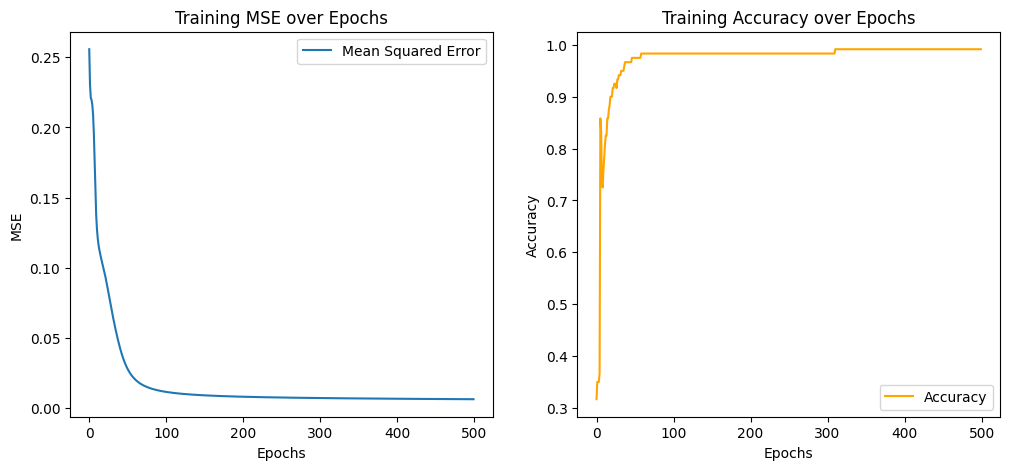

In [23]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(mse_history, label='Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training MSE over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label='Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()

plt.show()

In [24]:
# Feedforward on test data
z1_test = np.dot(X_test, W1) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2) + b2
a2_test = sigmoid(z2_test)

test_predictions = np.argmax(a2_test, axis=1)
test_targets = np.argmax(y_test, axis=1)

test_accuracy = np.mean(test_predictions == test_targets)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# Confusion matrix (optional)
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:\n", classification_report(test_targets, test_predictions))


Test Set Accuracy: 0.9667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Colab Link : https://colab.research.google.com/drive/1wXNm8bLHR5QP2lNpEPlkK4d9kZtNWD6p?usp=sharing